[StackOverflow data](https://drive.google.com/file/d/1w8z6HmFe4oCQSG6DjomSRUWvJ-gK0LTe/view?usp=sharing) 

In [7]:
PATH_TO_DATA = '../../data/stackoverflow'

In [2]:
classes = ['javascript', 'java', 'python', 'ruby',
           'php', 'c++', 'c#', 'go', 'scala', 'swift']

In [3]:
!ls $PATH_TO_DATA/*.tsv

../../data/stackoverflow/stackoverflow_raw_train_7500k.tsv


In [4]:
!du -hc $PATH_TO_DATA/*.tsv

7.8G	../../data/stackoverflow/stackoverflow_raw_train_7500k.tsv
7.8G	total


In [8]:
with open(f'{PATH_TO_DATA}/stackoverflow_raw_train_7500k.tsv') as reader:
    for i in range(10):
        print(reader.readline())

 is there a way to apply a background color through css at the tr level i can apply it at the td level like this my td background color e8e8e8 background e8e8e8 however the background color doesn t seem to get applied when i attempt to apply the background color at the tr level like this my tr background color e8e8e8 background e8e8e8 is there a css trick to making this work or does css not natively support this for some reason 	css css3 css-selectors

 i m using rails 3 2 13 ruby 1 9 3 and oracle 11g when saving a record in the db with a character like i get the error below activerecord statementinvalid encoding undefinedconversionerror u+00f1 from utf 8 to us ascii insert into omniauth_users created_at first_name id last_name status uid updated_at values a1 a2 a3 a4 a5 a6 a7 app controllers user_sessions_controller rb 18 in create i tried to run this query to see the language used by oracle select userenv language from dual it returned american_america al32utf8 these are my gems for 

In [9]:
!wc -l $PATH_TO_DATA/*.tsv

7500000 ../../data/stackoverflow/stackoverflow_raw_train_7500k.tsv


Convert csv to vw

In [47]:
%%time
with open(f'{PATH_TO_DATA}/stackoverflow_raw_train_7500k.tsv') as file:
    for line in file:
        question, topics = line.split('\t')
        try:
            topic_i = classes.index(topics.split()[0]) + 1
            line_vw = ' | '.join([str(topic_i), question.strip()])
            with open(f'{PATH_TO_DATA}/stackoverflow.vw', 'a') as writer:
                writer.write(line_vw)
                writer.write('\n')
        except ValueError:
            None        

Wall time: 13min 10s


In [13]:
!ls $PATH_TO_DATA/*.vw

../../data/stackoverflow/stackoverflow.vw


In [6]:
# example
!wc -l $PATH_TO_DATA/*.vw

 2194270 ../../data/stackoverflow/stackoverflow_train.vw
 1097133 ../../data/stackoverflow/stackoverflow_valid.vw
 3291403 total


In [10]:
# example
1097133 / (2194270 + 1097133 )

0.33333292823759353

In [10]:
# %%time
!wc -l $PATH_TO_DATA/*.vw

3273792 ../../data/stackoverflow/stackoverflow_train.vw


In [12]:
3273792 / 3 * 2

2182528.0

In [15]:
!split -l 2182528 $PATH_TO_DATA/stackoverflow.vw

In [18]:
!ls $PATH_TO_DATA/*.vw

../../data/stackoverflow/stackoverflow.vw
../../data/stackoverflow/stackoverflow_test.vw
../../data/stackoverflow/stackoverflow_train.vw


In [19]:
# %%time
!wc -l $PATH_TO_DATA/*.vw

   3273792 ../../data/stackoverflow/stackoverflow.vw
   1091264 ../../data/stackoverflow/stackoverflow_test.vw
   2182528 ../../data/stackoverflow/stackoverflow_train.vw
   6547584 total


In [20]:
6547584 / 2

3273792.0

In [17]:
!head -5 $PATH_TO_DATA/stackoverflow_train.vw

In [21]:
# mac: brew install vowpal-wabbit
!vw --version

8.5.0


In [22]:
!vw --help

Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = 
num sources = 1

VW options:
  --ring_size arg                       size of example ring
  --onethread                           Disable parse thread

Update options:
  -l [ --learning_rate ] arg            Set learning rate
  --power_t arg                         t power value
  --decay_learning_rate arg             Set Decay factor for learning_rate 
                                        between passes
  --initial_t arg                       initial t value
  --feature_mask arg                    Use existing regressor to determine 
                                        which parameters may be updated.  If no
                                        initial_regressor given, also used for 
                                        initial weights.

Weight options:
  -i [ --initial_regressor ] arg        Initial regressor(s)
  --initial_weight arg                  Set all weights t

In [23]:
%%time
!vw --oaa 10 -d $PATH_TO_DATA/stackoverflow_train.vw -f $PATH_TO_DATA/model.vw

final_regressor = ../../data/stackoverflow/model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = ../../data/stackoverflow/stackoverflow_train.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.000000 0.000000            1            1.0        1        1      161
0.500000 1.000000            2            2.0        4        1       68
0.750000 1.000000            4            4.0        7        1       88
0.875000 1.000000            8            8.0        7        2       95
0.875000 0.875000           16           16.0        7        7      209
0.843750 0.812500           32           32.0        7        5      174
0.812500 0.781250           64           64.0        7        6      125
0.695312 0.578125          128          128.0        5        1      143
0.621094 0.546875          256          256.0      

prediction for the validation set

In [24]:
%%time
!vw -i $PATH_TO_DATA/model.vw \
    -d $PATH_TO_DATA/stackoverflow_valid.vw \
    -p $PATH_TO_DATA/valid_pred.txt

predictions = ../../data/stackoverflow/valid_pred.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = ../../data/stackoverflow/stackoverflow_valid.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.000000 0.000000            1            1.0        2        2       87
0.000000 0.000000            2            2.0        7        7      114
0.000000 0.000000            4            4.0        7        7       61
0.250000 0.500000            8            8.0        1        3      383
0.187500 0.125000           16           16.0        7        7      132
0.281250 0.375000           32           32.0        6        6      288
0.171875 0.062500           64           64.0        7        7      514
0.148438 0.125000          128          128.0        6        6       55
0.183594 0.218750          256          256.0    

In [25]:
!head $PATH_TO_DATA/valid_pred.txt

2
7
7
7
6
2
5
3
3
3


In [32]:
%%time
valid_labels = []
with open(f'{PATH_TO_DATA}/stackoverflow_valid.vw') as file:
    for line in file:
#         print(file.readline()[0])
        valid_labels.append(line[0])

CPU times: user 3.25 s, sys: 1.43 s, total: 4.68 s
Wall time: 26.1 s


In [33]:
len(valid_labels)

1091264

In [34]:
%%time
with open(f'{PATH_TO_DATA}/stackoverflow_valid_labels.txt', 'w') as writer:
    writer.writelines('\n'.join(valid_labels))

CPU times: user 257 ms, sys: 0 ns, total: 257 ms
Wall time: 327 ms


In [35]:
!ls $PATH_TO_DATA/*.txt

../../data/stackoverflow/stackoverflow_valid_labels.txt
../../data/stackoverflow/valid_pred.txt


In [36]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
%%time
y_valid = np.loadtxt(PATH_TO_DATA + '/stackoverflow_valid_labels.txt')
valid_pred = np.loadtxt(PATH_TO_DATA + '/valid_pred.txt')

CPU times: user 7.64 s, sys: 0 ns, total: 7.64 s
Wall time: 7.83 s


In [22]:
# example
accuracy_score(y_valid, valid_pred)

0.8722643471666608

In [38]:
accuracy_score(y_valid, valid_pred)

0.8480321901941235

In [39]:
np.bincount(y_valid.astype('int'))

array([     0, 245277, 224670, 128734,  15307, 180878,  88584, 196789,
         1948,   9077])

In [40]:
from matplotlib import pyplot as plt 
import itertools 
%config InlineBackend.figure_format = 'retina'

def plot_confusion_matrix(actual, predicted, classes,
                          normalize=False,
                          title='Confusion matrix', figsize=(7,7),
                          cmap=plt.cm.Blues, path_to_save_fig=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    cm = confusion_matrix(actual, predicted).T
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    
    if path_to_save_fig:
        plt.savefig(path_to_save_fig, dpi=300, bbox_inches='tight')

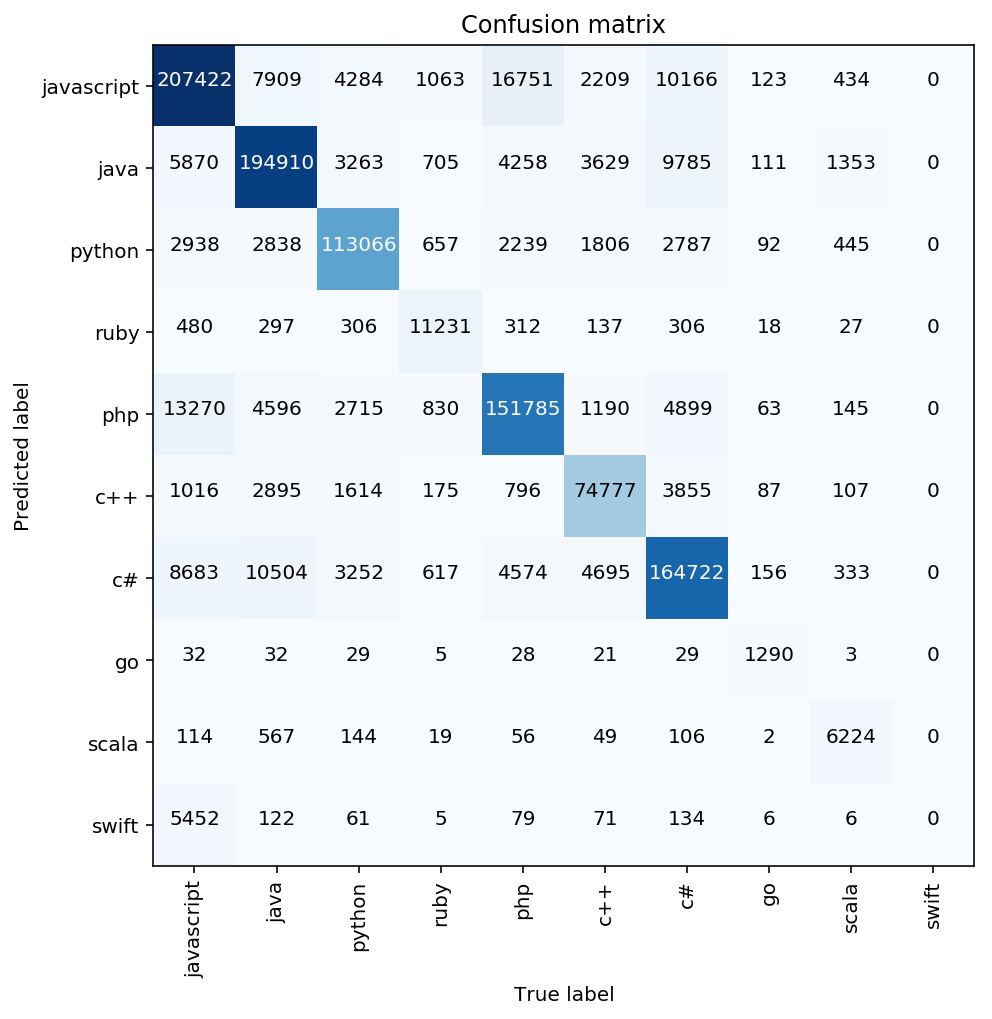

In [41]:
plot_confusion_matrix(actual=y_valid,
                     predicted=valid_pred,
                     classes=classes)

adding ngrams, increase hash space dim (#bits)

In [42]:
2 ** 26

67108864

In [43]:
%%time
!vw --oaa 10 -b 22 -d $PATH_TO_DATA/stackoverflow_train.vw \
    -f $PATH_TO_DATA/model2.vw --ngram 2 # --random_seed 17 --quiet -passes

Generating 2-grams for all namespaces.
final_regressor = ../../data/stackoverflow/model2.vw
Num weight bits = 22
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = ../../data/stackoverflow/stackoverflow_train.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.000000 0.000000            1            1.0        1        1      320
0.500000 1.000000            2            2.0        4        1      134
0.750000 1.000000            4            4.0        7        1      174
0.750000 0.750000            8            8.0        7        1      188
0.750000 0.750000           16           16.0        7        7      416
0.781250 0.812500           32           32.0        7        2      346
0.734375 0.687500           64           64.0        7        6      248
0.632812 0.531250          128          128.0        5        1      284
0.582031 0.

In [44]:
%%time
!vw -i $PATH_TO_DATA/model2.vw \
    -d $PATH_TO_DATA/stackoverflow_valid.vw \
    -p $PATH_TO_DATA/valid_pred2.txt

Generating 2-grams for all namespaces.
predictions = ../../data/stackoverflow/valid_pred2.txt
Num weight bits = 22
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = ../../data/stackoverflow/stackoverflow_valid.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.000000 0.000000            1            1.0        2        2      172
0.000000 0.000000            2            2.0        7        7      226
0.000000 0.000000            4            4.0        7        7      120
0.250000 0.500000            8            8.0        1        3      764
0.187500 0.125000           16           16.0        7        7      262
0.218750 0.250000           32           32.0        6        6      574
0.140625 0.062500           64           64.0        7        7     1026
0.109375 0.078125          128          128.0        6        6      108
0.136719 

In [45]:
%%time
valid_pred2 = np.loadtxt(PATH_TO_DATA + '/valid_pred2.txt')

CPU times: user 3.91 s, sys: 0 ns, total: 3.91 s
Wall time: 4 s


In [46]:
accuracy_score(y_valid, valid_pred2)

0.891086849744883

## Python wrapper

### Docker

In [5]:
#!sh run_docker_jupyter.sh festline/mlcourse_ai

In [47]:
!vw --version

8.5.0


In [48]:
from vowpalwabbit import pyvw

In [49]:
vw_model = pyvw.vw(b=18, oaa=10, quiet=True)

In [50]:
!ls $PATH_TO_DATA/*.vw

../../data/stackoverflow/model.vw
../../data/stackoverflow/model2.vw
../../data/stackoverflow/stackoverflow.vw
../../data/stackoverflow/stackoverflow_train.vw
../../data/stackoverflow/stackoverflow_valid.vw


In [51]:
!wc -l $PATH_TO_DATA/stack*.vw

   3273792 ../../data/stackoverflow/stackoverflow.vw
   2182528 ../../data/stackoverflow/stackoverflow_train.vw
   1091264 ../../data/stackoverflow/stackoverflow_valid.vw
   6547584 total


In [53]:
from tqdm.notebook import tqdm

In [54]:
%%time
with open(PATH_TO_DATA + '/stackoverflow_train.vw') as f:
    # '1 | question text'
    for line in tqdm(f, total=2182528):
        vw_model.learn(line)


CPU times: user 56.9 s, sys: 2.89 s, total: 59.8 s
Wall time: 1min 40s


In [56]:
%%time
valid_predictions = []
with open(PATH_TO_DATA + '/stackoverflow_valid.vw') as f:
    # '1 | question text'
    for line in tqdm(f, total=1091264):
        curr_prediction = vw_model.predict(line)
        valid_predictions.append(curr_prediction)


CPU times: user 50.3 s, sys: 1.27 s, total: 51.6 s
Wall time: 1min 16s


In [57]:
import numpy as np
from sklearn.metrics import accuracy_score

In [58]:
y_valid = np.loadtxt(PATH_TO_DATA + '/stackoverflow_valid_labels.txt')

In [59]:
accuracy_score(y_valid, valid_predictions)

0.8582387030086212

### Local

In [1]:
from vowpalwabbit import pyvw

In [2]:
vw_model = pyvw.vw(b=18, oaa=10, quiet=True)

In [5]:
from tqdm.notebook import tqdm

In [8]:
%%time
with open(PATH_TO_DATA + '/stackoverflow_train.vw') as f:
    # '1 | question text'
    for line in tqdm(f, total=2182528):
        vw_model.learn(line)

  0%|          | 0/2182528 [00:00<?, ?it/s]

Wall time: 1min 13s


In [9]:
%%time
valid_predictions = []
with open(PATH_TO_DATA + '/stackoverflow_valid.vw') as f:
    # '1 | question text'
    for line in tqdm(f, total=1091264):
        curr_prediction = vw_model.predict(line)
        valid_predictions.append(curr_prediction)

  0%|          | 0/1091264 [00:00<?, ?it/s]

Wall time: 41 s


In [10]:
import numpy as np
from sklearn.metrics import accuracy_score

In [11]:
y_valid = np.loadtxt(PATH_TO_DATA + '/stackoverflow_valid_labels.txt')

In [12]:
accuracy_score(y_valid, valid_predictions)

0.8582872705413173